In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor

df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [2]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [3]:
df = df.drop('name', axis=1)
df = pd.get_dummies(df)
df.shape

(2360, 53)

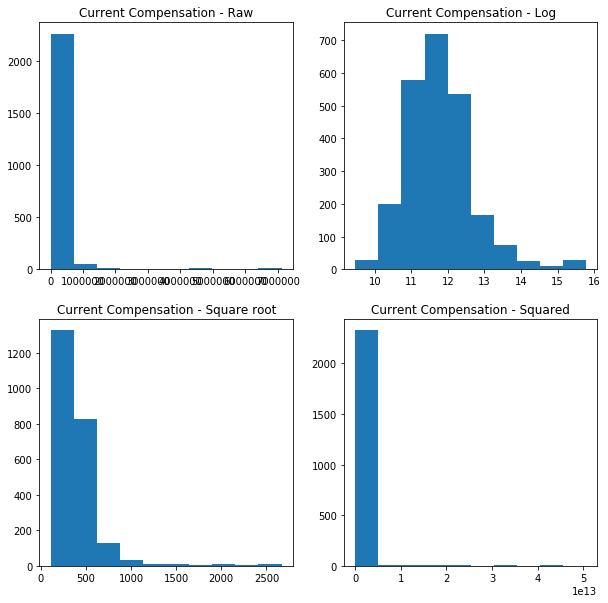

In [4]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.hist(df['current_compensation'].dropna())
plt.title('Current Compensation - Raw')

fig.add_subplot(222)
plt.hist(np.log(df['current_compensation'].dropna()))
plt.title('Current Compensation - Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['current_compensation'].dropna()))
plt.title('Current Compensation - Square root')

fig.add_subplot(224)
plt.hist((df['current_compensation']*df['current_compensation']))
plt.title('Current Compensation - Squared')
plt.show()

In [5]:
df['current_comp_log'] = np.log(df['current_compensation'])
df = df.drop('current_compensation', axis = 1)

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
Y_train = df_train['next_year_compensation']
X_test = df_test.loc[:, ~(df_test.columns).isin(['next_year_compensation'])]
Y_test = df_test['next_year_compensation']

In [7]:
linear = LinearRegression()
ridge = Ridge()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
theilsan = TheilSenRegressor()
ransac = RANSACRegressor()
huber = HuberRegressor()

In [8]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
    y = dataframe['next_year_compensation']
    r2_scores = cross_val_score(model, x, y, cv=10)
    r2 = r2_scores.mean()
    mse_scores = cross_val_score(model,x,y, cv=10, scoring='neg_mean_squared_error')
    mse = mse_scores.mean() * -1
    rmse = np.sqrt(mse)
    print(model)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)

In [9]:
get_metrics(linear, df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 Score: 0.464680532213
MSE: 189383587230.0
RMSE: 435182.245996


In [10]:
get_metrics(ridge,df_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 Score: 0.465677769388
MSE: 189108173277.0
RMSE: 434865.695678


In [11]:
get_metrics(gbr, df_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 Score: 0.920472659217
MSE: 30731592968.0
RMSE: 175304.286793


In [12]:
get_metrics(rfr, df_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2 Score: 0.92249909092
MSE: 32647315949.8
RMSE: 180685.682747


In [13]:
get_metrics(theilsan, df_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)
R2 Score: 0.378504788383
MSE: 238385742550.0
RMSE: 488247.624213


In [14]:
get_metrics(ransac, df_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)
R2 Score: 0.155134065732
MSE: 316976082773.0
RMSE: 563006.290172


In [15]:
get_metrics(huber, df_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
R2 Score: 0.221449238984
MSE: 297789318602.0
RMSE: 545700.75921


In [ ]:
# Not using Log of current compensation due to how bad scores were